In [ ]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
data_path = kagglehub.competition_download('playground-series-s5e7')

print('Data source import complete.')

Data source import complete.


In [ ]:
print(data_path)

/root/.cache/kagglehub/competitions/playground-series-s5e7


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_data = pd.read_csv(os.path.join(data_path, 'test.csv'))

Original dataset

In [ ]:
# df_orig = pd.read_csv('/content/drive/MyDrive/code/kaggle/S5E7_introvert_extrovert/personality_datasert.csv')

In [ ]:
# df_orig.head()

In [ ]:
# data = data.drop(columns=['id'])

# common_cols = data.columns.intersection(df_orig.columns)

# train_aligned = data[common_cols]
# df_orig_aligned = df_orig[common_cols]

# data = pd.concat([train_aligned, df_orig_aligned], axis=0).reset_index(drop=True)

# EDA

In [ ]:
data.shape

(18524, 9)

In [ ]:
data.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [ ]:
data.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
missing_table = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage (%)': (data.isnull().mean() * 100).round(2)
})

print(missing_table.sort_values(by='Missing Values', ascending=False))

                           Missing Values  Percentage (%)
Stage_fear                           1893           10.22
Going_outside                        1466            7.91
Post_frequency                       1264            6.82
Time_spent_Alone                     1190            6.42
Social_event_attendance              1180            6.37
Drained_after_socializing            1149            6.20
Friends_circle_size                  1054            5.69
id                                      0            0.00
Personality                             0            0.00


In [ ]:
data.nunique()

,0
id,18524
Time_spent_Alone,12
Stage_fear,2
Social_event_attendance,11
Going_outside,8
Drained_after_socializing,2
Friends_circle_size,16
Post_frequency,11
Personality,2


In [ ]:
print(f"Duplicates before dropping: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Duplicates after dropping: {data.duplicated().sum()}")

Duplicates before dropping: 0
Duplicates after dropping: 0



Check dataset balance

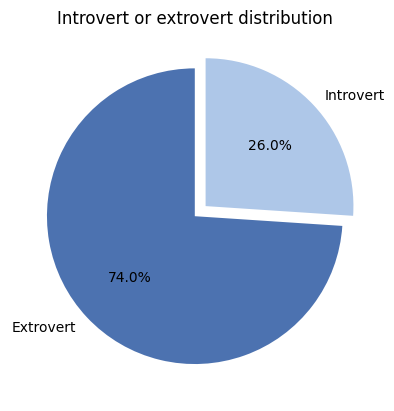

In [ ]:
data['Personality'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Introvert or extrovert distribution')
plt.ylabel('')
plt.show()

# Data visualisations

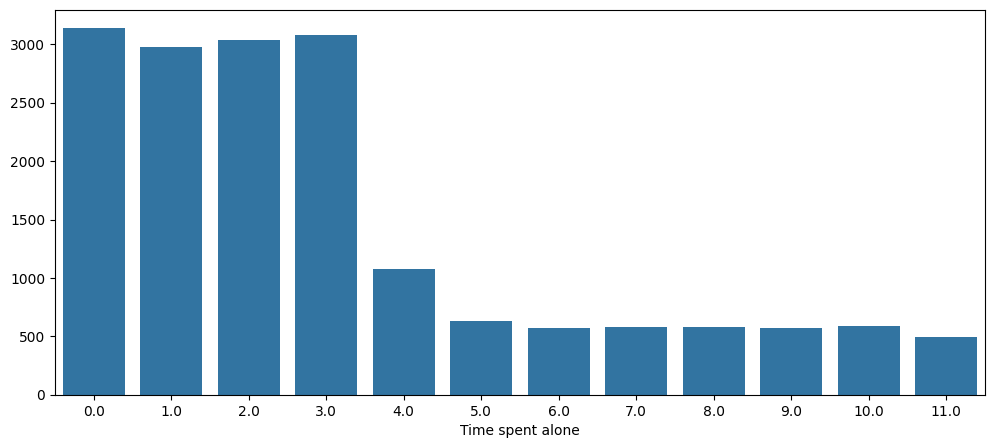

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="Time_spent_Alone")
plt.xlabel('Time spent alone')
plt.ylabel('')
plt.show()

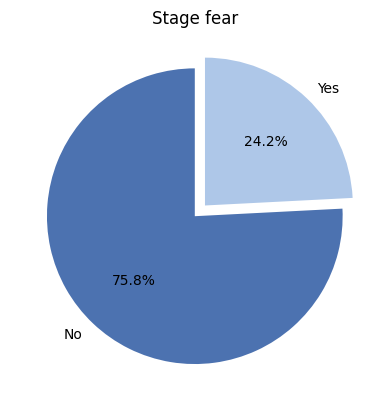

In [ ]:
data['Stage_fear'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Stage fear')
plt.ylabel('')
plt.show()

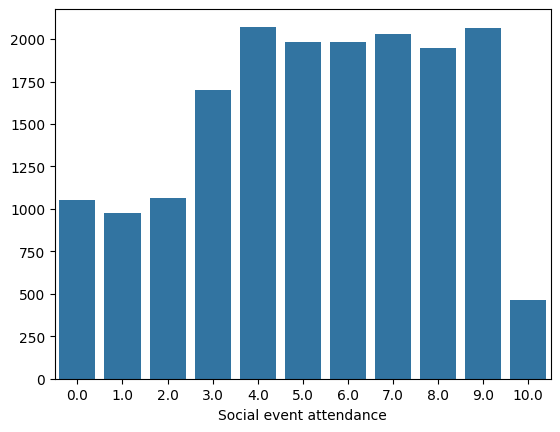

In [ ]:
sns.countplot(data=data, x="Social_event_attendance")
plt.xlabel('Social event attendance')
plt.ylabel('')
plt.show()

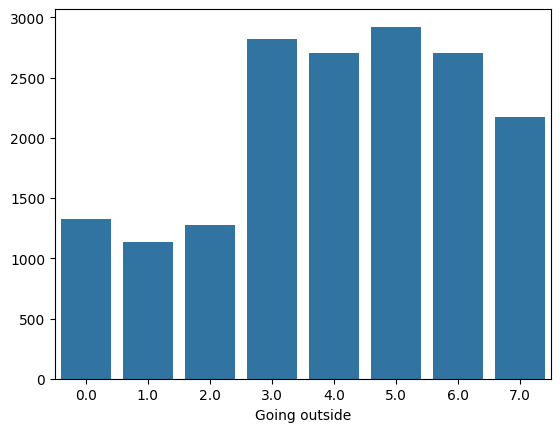

In [ ]:
sns.countplot(data=data, x="Going_outside")
plt.xlabel('Going outside')
plt.ylabel('')
plt.show()

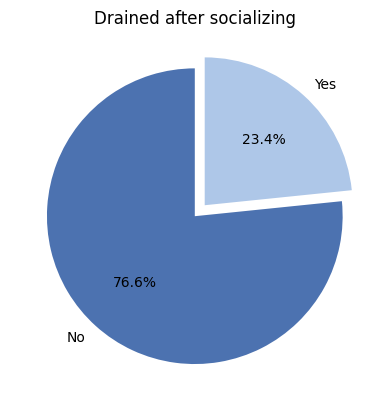

In [ ]:
data['Drained_after_socializing'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Drained after socializing')
plt.ylabel('')
plt.show()

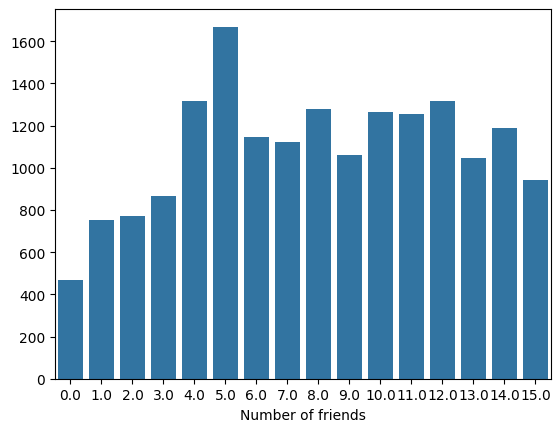

In [ ]:
sns.countplot(data=data, x="Friends_circle_size")
plt.xlabel('Number of friends')
plt.ylabel('')
plt.show()

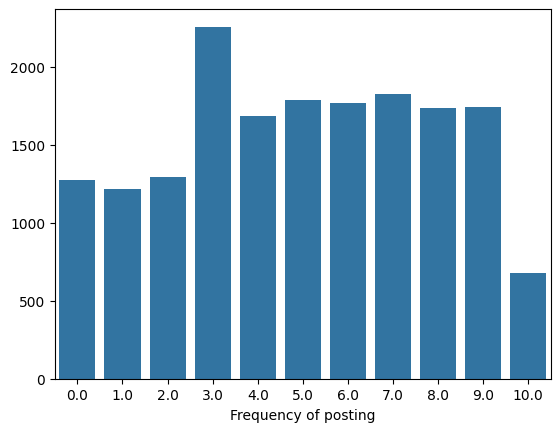

In [ ]:
sns.countplot(data=data, x="Post_frequency")
plt.xlabel('Frequency of posting')
plt.ylabel('')
plt.show()

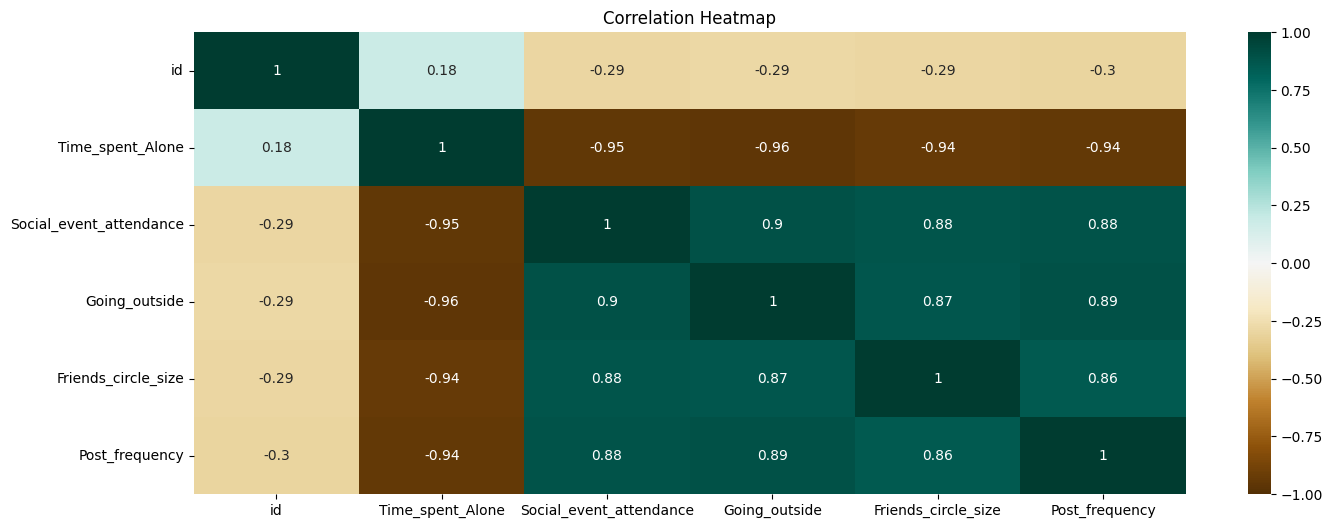

In [ ]:
plt.figure(figsize=(16, 6))

data_corr = data.corr(numeric_only=True)

heatmap = sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

plt.show()

# Data preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle

In [ ]:
X = data.drop(['Personality','id'], axis=1)
y = data['Personality']

In [ ]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names_out_ = None

    def fit(self, X, y = None):
      return self

    def transform(self, X):
        X = X.copy()

        X['Social_score'] = X['Social_event_attendance'] + X['Going_outside'] + X['Friends_circle_size']
        X['Introvert_score'] = X['Time_spent_Alone'] - X['Social_score']
        X['Alone_to_friends_ratio'] = X['Time_spent_Alone'] / (X['Friends_circle_size'] + 1)
        X['Social_post_interaction'] = X['Post_frequency'] * X['Social_event_attendance']

        self.feature_names_out_ = X.columns.tolist()

        return X

    def get_feature_names_out(self, input_features=None):
        return self.feature_names_out_

In [ ]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean', add_indicator=False)),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=False)),
    ('encoder', OrdinalEncoder())
])

In [ ]:
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, make_column_selector(dtype_include=['int64', 'float64'])),
    ('cat', categorical_pipeline, make_column_selector(dtype_include=['object']))
])

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

# Model building

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import shap
shap.initjs()

In [ ]:
counter = Counter(y)
scale_pos_weight = counter[0] / counter[1]

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
best_params =  {'max_depth': 5,
                  'learning_rate': 0.016936843011325364,
                  'n_estimators': 958,
                  'subsample': 0.5385682613272109,
                  'colsample_bytree': 0.5185754497137016,
                  'min_child_weight': 1,
                  'gamma': 0.1832798205532591,
                  'n_jobs': -1,
                  "objective" : "binary:logistic",
                  "eval_metric" : "logloss"
                  }

In [ ]:
lgbm_params = {'classifier__colsample_bytree': 0.7,
               'classifier__learning_rate': 0.05,
               'classifier__n_estimators': 300,
               'classifier__num_leaves': 20,
               'classifier__subsample': 0.7}

In [ ]:
# def objective(trial):
#     params = {
#         'max_depth': trial.suggest_int('max_depth', 3, 18),
#         'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
#         'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#     }


#     xgb_pipeline = Pipeline([
#     ('features', FeatureEngineer()),
#     ('preprocessing', preprocessor),
#     ('classifier', XGBClassifier(**params,
#                                  tree_method = 'hist',
#                                  device =  'cuda',
#                                  scale_pos_weight = scale_pos_weight))
#     ])


#     score = cross_val_score(xgb_pipeline, X, y, cv=cv,  scoring='accuracy').mean()
#     return score

In [ ]:
# ! pip install optuna

In [ ]:
# import optuna

# study = optuna.create_study(study_name="example_xgboost_study", direction='maximize')
# study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

# best_params = study.best_params
# print(f"\nBest parameters: {best_params}")

In [ ]:
xgb_pipeline = Pipeline([
    ('features', FeatureEngineer()),
    ('preprocessing', preprocessor)
    ])

In [ ]:
X_preprocessed = xgb_pipeline.fit_transform(X)
X_test_preprocessed = xgb_pipeline.transform(test_data)

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X_preprocessed))
test_preds = np.zeros(len(X_test_preprocessed))
all_shap_values = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_preprocessed, y)):
    X_train, X_val = X_preprocessed[train_idx], X_preprocessed[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test_preprocessed)

    xgb_model = xgb.train(best_params, dtrain, num_boost_round=100,
                      evals=[(dval, "valid")],
                      early_stopping_rounds=10, verbose_eval=False)

    explainer = shap.TreeExplainer(model)
    shap_vals = explainer.shap_values(X_val)
    all_shap_values.append(shap_vals)

    oof_preds[val_idx] = model.predict(dval) > 0.5
    test_preds += model.predict(dtest) / skf.n_splits

cv_acc = accuracy_score(y, oof_preds)
print(f"Cross-Validation Accuracy: {cv_acc:.4f}")

Cross-Validation Accuracy: 0.9687


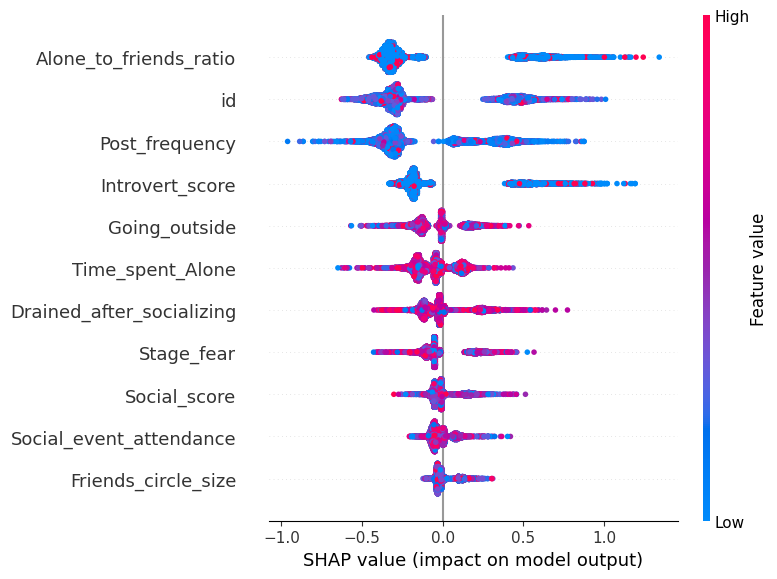

In [ ]:
feature_engineer = xgb_pipeline.named_steps['features']
feature_names = feature_engineer.get_feature_names_out()

combined_shap = np.vstack(all_shap_values)
shap.summary_plot(combined_shap, X_preprocessed, feature_names=feature_names)

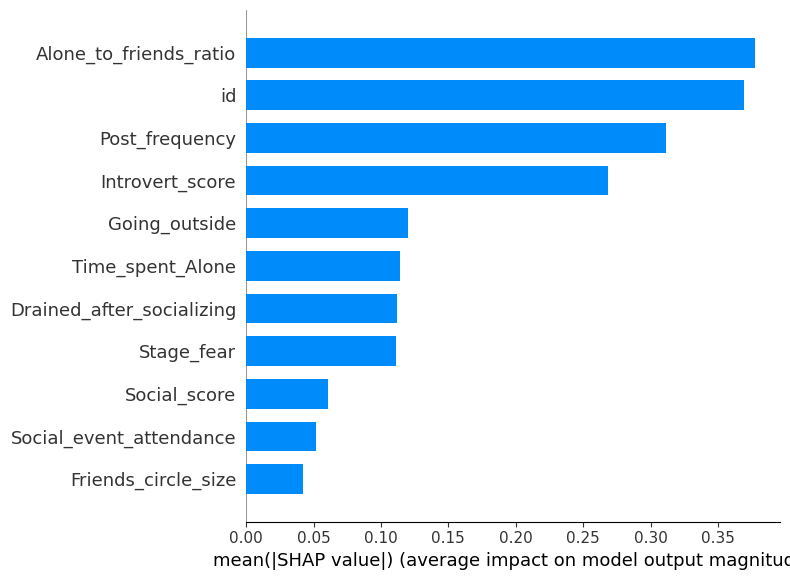

In [ ]:
shap.summary_plot(combined_shap, X_preprocessed, feature_names=feature_names, plot_type="bar")

# Submition

In [ ]:
y_pred_test = (test_preds >= 0.5).astype(int)

In [ ]:
mapping = {0: "Extrovert", 1: "Introvert"}

y_test_labels = pd.Series(y_pred_test).map(mapping)

In [ ]:
submission = pd.DataFrame({
    'id': test_data["id"],
    'Personality': y_test_labels
})

In [ ]:
submission

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [ ]:
submission.to_csv('submission.csv', index=False)